 Step 2: Data Sampling and Splitting

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
file_path = '../data/credit_card_transactions.csv'
data = pd.read_csv(file_path)
print('data loading complete')

data loading complete


In [3]:
# Basic preprocessing
data['Timestamp'] = pd.to_datetime(data[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1) + ' ' + data['Time'])
data['Amount'] = data['Amount'].replace('[\$,]', '', regex=True).astype(float)
data.drop(columns=['User', 'Card', 'Year', 'Month', 'Day', 'Time', 'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC', 'Errors?', 'Is Fraud?'], inplace=True)

# Drop missing values
data.dropna(inplace=True)

# Extract day of week, month, and hour from the timestamp
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour

# Label encode the 'Use Chip' column
label_encoder = LabelEncoder()
data['Use Chip'] = label_encoder.fit_transform(data['Use Chip'])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the sampled data
train_data.to_csv('../data/train_data.csv', index=False)
test_data.to_csv('../data/test_data.csv', index=False)

print("Data sampling and splitting completed.")


Data sampling and splitting completed.


<class 'pandas.core.frame.DataFrame'>
Index: 15970 entries, 3852 to 15795
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Amount     15970 non-null  float64       
 1   Use Chip   15970 non-null  int64         
 2   Timestamp  15970 non-null  datetime64[ns]
 3   DayOfWeek  15970 non-null  int32         
 4   Month      15970 non-null  int32         
 5   Hour       15970 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1)
memory usage: 686.2 KB
None
             Amount      Use Chip                      Timestamp  \
count  15970.000000  15970.000000                          15970   
mean      81.260420      1.656857  2011-06-30 15:23:49.273637888   
min     -499.000000      0.000000            2002-09-01 06:42:00   
25%       36.590000      2.000000            2007-02-02 17:25:45   
50%       69.540000      2.000000            2011-07-18 05:16:00   
75%      125.767500     

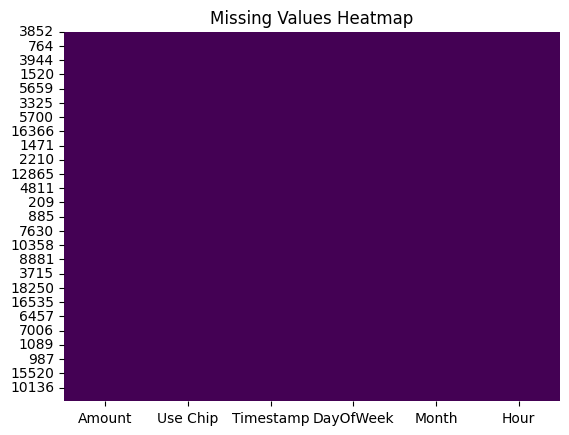

In [4]:
# Display basic information
print(train_data.info())
print(train_data.describe())

# Display first few rows
print(train_data.head())

# Display first few rows
print(train_data.head())


# Visualize missing values
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()